### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import Markdown

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# total number of data samples
total = data.shape[0]

# determine how much data is missing
missing = pd.DataFrame({'count': data[data['coupon'] == 'Bar'].isnull().sum()})

# determine how many columns have missing data
print(f'{missing[missing['count'] > 0].shape[0]} of {data[data['coupon'] == 'Bar'].shape[1]} columns have missing data')

# calculate the percentage of data that is missing for the columns that have missing data
missing['percent'] = missing['count']/total
missing[missing['count'] > 0].style.format({
  'count': '{:,d}',
  'percent': '{:.2%}',
})

6 of 26 columns have missing data


,count,percent
car,"2,004",15.80%
Bar,21,0.17%
CoffeeHouse,39,0.31%
CarryAway,24,0.19%
RestaurantLessThan20,23,0.18%
Restaurant20To50,36,0.28%


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# drop the `car` column
data = data.drop(['car'], axis=1)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
# evaluate whether to ignore rows with missing data
num_rows_with_missing_data = data[data.isnull().any(axis=1)].shape[0]
Markdown(f'percent of rows with missing data: {num_rows_with_missing_data/total:.02%}')

percent of rows with missing data: 4.77%

In [7]:
# since the number of rows with missing data less than 5%, drop rows with missing data
original_total = data.shape[0]
data = data.dropna()
Markdown(f'dropped {original_total-data.shape[0]} of {original_total:,.0f} records, ' + f'retained {data.shape[0] / original_total:.1%} of original records.')

dropped 605 of 12,684 records, retained 95.2% of original records.

In [8]:
# fix column mispelling
data = data.rename(columns={'passanger': 'passenger'})
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [9]:
Markdown(f'Proportion that chose to accept the coupon: {data['Y'].mean():.01%}')

Proportion that chose to accept the coupon: 56.9%

5. Use a bar plot to visualize the `coupon` column.

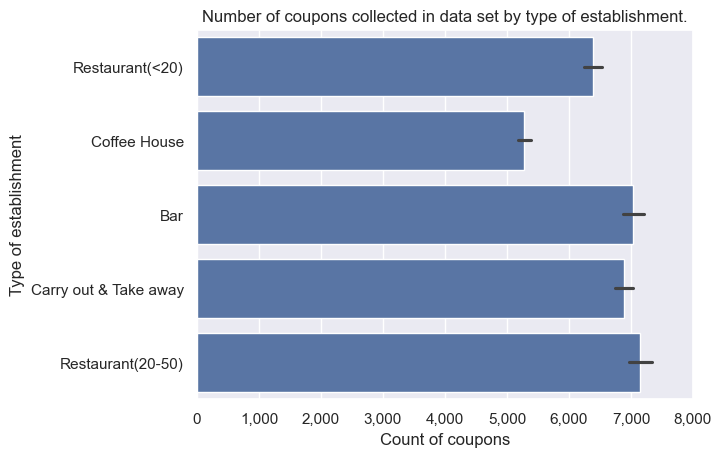

In [38]:
# plot the coupon data
sns.barplot(data['coupon'])

plt.title("Number of coupons collected in data set by type of establishment.")
plt.xlabel('Count of coupons')
plt.ylabel('Type of establishment')
# format the x labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticks(current_values)
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

6. Use a histogram to visualize the temperature column.

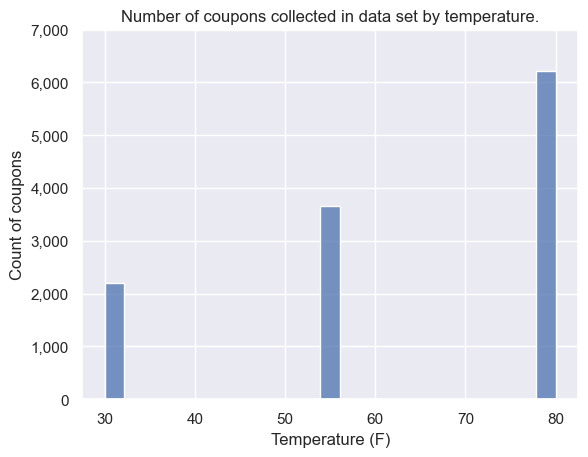

In [64]:
sns.histplot(data, x='temperature')

plt.title("Number of coupons collected in data set by temperature.")
plt.xlabel('Temperature (F)')
plt.ylabel('Count of coupons')
# format the y labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticks(current_values)
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.show()

### Explore the data set
Get to know the data.

In [12]:
## Create a helper function to plot a family of related attributes
def plot_columns(df, columns, horizontal = False, spacing = 0.4):
  colors = ['skyblue', 'olive', 'gold', 'teal', 'orange', 'lightcoral', 'mediumorchid', 'slategray'] 

  sns.set_theme(style="darkgrid")

  fig, axs = plt.subplots(1, len(columns), figsize=(15, 2))

  i = 0
  for col in columns:
    if horizontal:
      sns.histplot(df, y=col, color=colors.pop(0), ax=axs[i])
    else:
      sns.histplot(df, x=col, color=colors.pop(0), ax=axs[i])
    i += 1

  # Adjust the spacing between subplots
  plt.subplots_adjust(wspace=spacing)  # Adjust horizontal spacing

  # Set the font size for all subplots
  for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

  plt.show()

In [39]:
# explore the columns in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

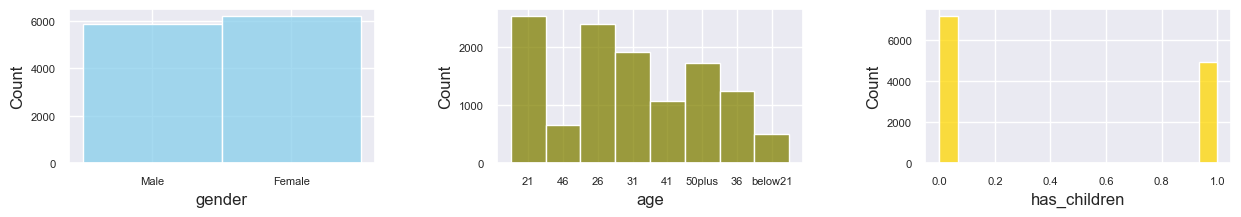

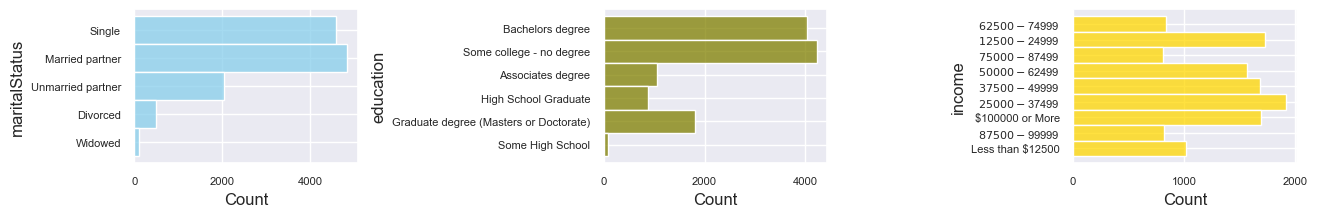

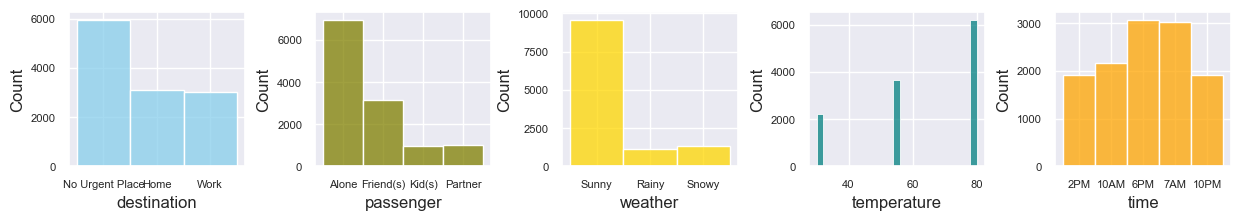

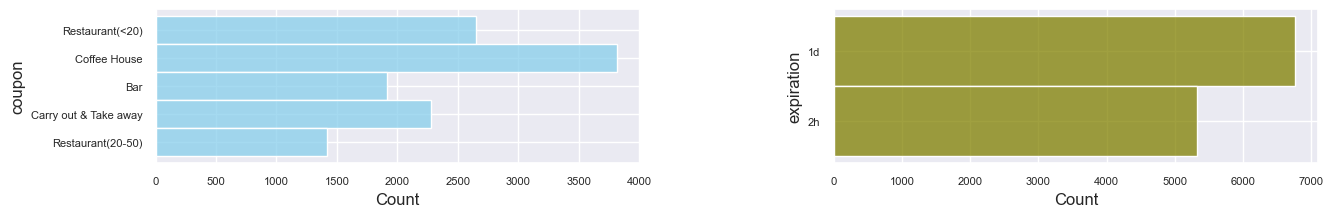

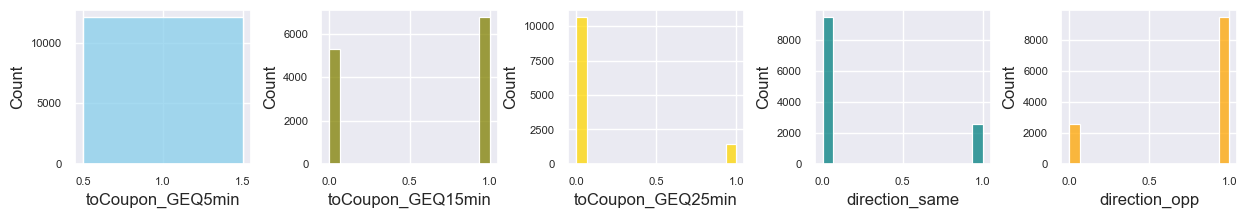

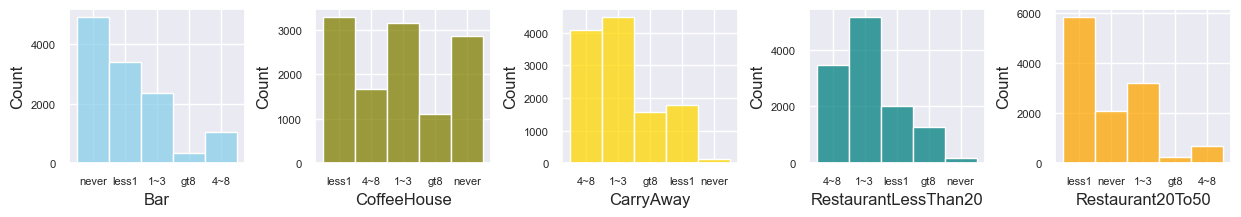

In [14]:
# look at driver attributes
plot_columns(data, ['gender', 'age', 'has_children'])
plot_columns(data, ['maritalStatus', 'education', 'income'], horizontal=True, spacing = 1.1)

# look at trip attributes
plot_columns(data, ['destination', 'passenger', 'weather', 'temperature', 'time'])

# look at coupon attributes
plot_columns(data, ['coupon', 'expiration'], horizontal=True)
plot_columns(data, ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp'])

# look at restaurant habits
plot_columns(data, ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

In [15]:
# explore counts by occupation
pd.DataFrame({'occupation': data.groupby(['occupation'])['occupation'].count()})

,occupation
occupation,
Architecture & Engineering,175
Arts Design Entertainment Sports & Media,564
Building & Grounds Cleaning & Maintenance,44
Business & Financial,516
Community & Social Services,219
Computer & Mathematical,1368
Construction & Extraction,154
Education&Training&Library,855
Farming Fishing & Forestry,43


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
bar_coupons = data.query('coupon == "Bar"')
bar_coupons.sample(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6114,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Male,26,Married partner,...,never,1~3,1~3,less1,1,0,0,0,1,0
4501,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,36,Unmarried partner,...,gt8,4~8,gt8,1~3,1,0,0,0,1,0
11254,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,less1,less1,less1,less1,1,1,1,0,1,0
9108,Work,Alone,Rainy,55,7AM,Bar,1d,Male,26,Married partner,...,never,1~3,less1,less1,1,1,1,0,1,1
3505,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Divorced,...,less1,4~8,1~3,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [17]:
lines = [
  '#### Answer 2:',
  f'<span style="font-size: medium">{bar_coupons['Y'].mean():.01%}</span> of bar coupons were accepted.'
]
Markdown('\n'.join(lines))

#### Answer 2:
<span style="font-size: medium">41.2%</span> of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
# print the count of Bar visits by frequency group
print(pd.DataFrame({'bar visits': bar_coupons.groupby(['Bar'])['Bar'].count()}).T)
print()

# define frequency groups
fewer_group = ['never', 'less1', '1~3']
frequent_group = ['4~8', 'gt8']

# create filtered views of the data based on frequency groups
fewer_visits = bar_coupons.query('Bar in @fewer_group')
frequent_visits = bar_coupons.query('Bar in @frequent_group')

# verify the two conditions capture all records
assert bar_coupons.shape[0] == fewer_visits.shape[0] + frequent_visits.shape[0]


# compare the bar coupon acceptance rates
lines = [
  '#### Answer 3:',
  f'<span style="font-size: medium">{frequent_visits['Y'].mean():.1%}</span> of the drivers who frequent bars more than 3 times a month accepted bar coupons, ',
  f'while only <span style="font-size: medium">{fewer_visits['Y'].mean():.1%}</span> of drivers who frequent bars less often accepted bar coupons.',
]
Markdown('\n'.join(lines))

Bar         1~3  4~8  gt8  less1  never
bar visits  379  147   46    553    788



#### Answer 3:
<span style="font-size: medium">76.2%</span> of the drivers who frequent bars more than 3 times a month accepted bar coupons, 
while only <span style="font-size: medium">37.3%</span> of drivers who frequent bars less often accepted bar coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
# explore counts by age group
print(pd.DataFrame({'age': bar_coupons.groupby(['age'])['age'].count()}).T)
print()

# define group to capture drives over the age of 25
more_than_25_group = ['26', '31', '36', '41', '46', '50plus']

# define group to capture drives who go to bars more than once per month
more_than_once_per_month_group = ['1~3', '4~8', 'gt8']

# filter the data to only include drivers older than 25 who go to bars at least once per month
more_than_25_and_frequent = bar_coupons.query('age in @more_than_25_group and Bar in @more_than_once_per_month_group')
print(more_than_25_and_frequent.groupby(['age', 'Bar'])['Y'].sum().head())

# filter the data to only include the other drivers: 25 or less, or go to bars less than once per month
not_more_than_25_and_frequent = bar_coupons.query('age not in @more_than_25_group or Bar not in @more_than_once_per_month_group')
print(not_more_than_25_and_frequent.groupby(['age', 'Bar'])['Y'].sum().head(10))
print()

# verify the two conditions capture all records
assert bar_coupons.shape[0] == more_than_25_and_frequent.shape[0] + not_more_than_25_and_frequent.shape[0]

# compare the bar coupon acceptance rates
lines = [
  '#### Answer 4:',
  f'<span style="font-size: medium">{more_than_25_and_frequent['Y'].mean():.01%}</span> of the drivers who are at least 25 years old and go to bars more than once per month accepted bar coupons, '
  f'while only <span style="font-size: medium">{not_more_than_25_and_frequent['Y'].mean():.01%}</span> of other drivers accepted bar coupons.'
]
Markdown('\n'.join(lines))

age   21   26   31   36   41   46  50plus  below21
age  397  368  324  196  171  103     273       81

age  Bar
26   1~3    63
     4~8    44
     gt8    15
31   1~3    44
     4~8    14
Name: Y, dtype: int64
age  Bar  
21   1~3      67
     4~8      33
     gt8      10
     less1    61
     never    29
26   less1    35
     never    22
31   less1    37
     never    24
36   less1    24
Name: Y, dtype: int64



#### Answer 4:
<span style="font-size: medium">69.0%</span> of the drivers who are at least 25 years old and go to bars more than once per month accepted bar coupons, while only <span style="font-size: medium">33.8%</span> of other drivers accepted bar coupons.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [20]:
# explore counts by passenger group
print(pd.DataFrame({'passenger': bar_coupons.groupby(['passenger'])['passenger'].count()}).T)
print()


passenger  Alone  Friend(s)  Kid(s)  Partner
passenger   1141        318     194      260



In [21]:
# define criteria with passenger not kids
with_passenger_not_kid = ['Friend(s)', 'Partner']

# filter the set of interest: drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
focus = bar_coupons.query('occupation != "Farming Fishing & Forestry" and passenger in @with_passenger_not_kid and Bar in @more_than_once_per_month_group')

# filter the complimentary set
other = bar_coupons.query('occupation == "Farming Fishing & Forestry" or passenger not in @with_passenger_not_kid or Bar not in @more_than_once_per_month_group')

# verify the two conditions capture all records
assert bar_coupons.shape[0] == focus.shape[0] + other.shape[0]

# compare the bar coupon acceptance rates
lines = [
  '#### Answer 5:',
  f'<span style="font-size: medium">{focus['Y'].mean():.01%}</span> of drivers _NOT_ working in `Farming Fishing & Forestry`, and travelling with adult passengers, and who frequent bars at least once a month accepted bar coupons, ',
  f'while only <span style="font-size: medium">{other['Y'].mean():.01%}</span> of other drivers accepted bar coupons.',
]
Markdown('\n'.join(lines))

#### Answer 5:
<span style="font-size: medium">71.4%</span> of drivers _NOT_ working in `Farming Fishing & Forestry`, and travelling with adult passengers, and who frequent bars at least once a month accepted bar coupons, 
while only <span style="font-size: medium">37.9%</span> of other drivers accepted bar coupons.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:
# explore counts by marital status
print(pd.DataFrame({'maritalStatus': bar_coupons.groupby(['maritalStatus'])['maritalStatus'].count()}).T)
print()

# explore counts by income
print(pd.DataFrame({'income': bar_coupons.groupby(['income'])['income'].count()}))
print()

# filter the data to the criteria of interest
less_than_30 = ['below21', '21', '26']
more_than_4_times = ['4~8', 'gt8']
less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
query = '(Bar in @more_than_once_per_month_group) and (passenger != "Kid(s)") and (maritalStatus != "Widowed")' + \
    ' or ' + \
    '(Bar in @more_than_once_per_month_group and age in @less_than_30)' + \
    ' or ' + \
    '(RestaurantLessThan20 in @more_than_4_times and income in @less_than_50k)'
focus = bar_coupons.query(query)
other = bar_coupons.query('not(' + query + ')')

# verify the two conditions capture all records
assert bar_coupons.shape[0] == focus.shape[0] + other.shape[0]

# compare the bar coupon acceptance rates
lines = [
  '### Answer 6:',
  f'<span style="font-size: medium">{focus['Y'].mean():.01%}</span> of drivers who',
  'go to bars at least once a month, traveling with adult passengers, and who are not widowers,',
  '_OR_',
  'who go to bars more that once a month and are under 30,',
  '_OR_',
  'who go to cheap restaurants more than 4 times a month and have an income of less than 50K',
  'accepted bar coupons, '
  f'while only <span style="font-size: medium">{other['Y'].mean():.01%}</span> of other drivers accepted bar coupons.',
]
Markdown('\n'.join(lines))

maritalStatus  Divorced  Married partner  Single  Unmarried partner  Widowed
maritalStatus        73              833     638                352       17

                  income
income                  
$100000 or More      282
$12500 - $24999      271
$25000 - $37499      300
$37500 - $49999      247
$50000 - $62499      249
$62500 - $74999      129
$75000 - $87499      143
$87500 - $99999      133
Less than $12500     159



### Answer 6:
<span style="font-size: medium">58.7%</span> of drivers who
go to bars at least once a month, traveling with adult passengers, and who are not widowers,
_OR_
who go to bars more that once a month and are under 30,
_OR_
who go to cheap restaurants more than 4 times a month and have an income of less than 50K
accepted bar coupons, while only <span style="font-size: medium">30.0%</span> of other drivers accepted bar coupons.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Answer 7:**

The average coupon acceptance rate for bar coupons is 41.2%. However, drivers that go to bars tend to accept coupons. 76.2% of drivers who go to bars more than 3 times a month, and 69.0% of drivers over the age of 25 who go to bars once a month, and 71.4% of drivers traveling with adult passengers accepted coupons.

In contrast, 58.7% of the drivers who go to bars at least once a month but who were under the age of 30, or who go to cheap restaurants more than 4 times a month and make an income less than $50k accepted coupons.

We can hypothesize that drivers that tend to go to bars and have disposable income are likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [40]:
# acceptance rate by coupon type
pd.DataFrame(
  {
    'rate': data.groupby('coupon')['Y'].mean(),
    'count': data.groupby('coupon')['Y'].count(),
  }
).style.format(
  {
    'rate': '{:.1%}',
    'count': '{:,.0f}',
  }
)

,rate,count
coupon,,
Bar,41.2%,"1,913"
Carry out & Take away,73.8%,"2,280"
Coffee House,49.6%,"3,816"
Restaurant(20-50),44.6%,"1,417"
Restaurant(<20),70.9%,"2,653"


In [41]:
#
# helpers
#

# negate a query to get the complement set for comparison
not_ = lambda s: f'not({s})'

# format rate
format_rate = lambda r: f'<span style="font-size: medium">{r:.1%}</span>'

# display acceptance rate comparison results
def format_results(t_rate, t_n, o_rate, o_n):
  # format the rate so it can be read easily
  show_rate = lambda r, n: f'{format_rate(r)} ({n:,.0f} samples)'
  return f'{show_rate(t_rate, t_n)}, {show_rate(o_rate, o_n)}'

# compare the coupon acceptance rate for on the given dataframe for the driver group of interest 
def compare(df, criteria):
  query = ' and '.join(criteria)
  focus = df.query(query)
  other = df.query(not_(query))
  return focus['Y'].mean(), other['Y'].mean(), focus.shape[0], other.shape[0]

#### 1. Create a data frame of coffee shop coupons

In [42]:
coffee_shops = data.query('coupon == "Coffee House"')
coffee_shops.sample(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1524,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,36,Married partner,...,1~3,1~3,less1,less1,1,0,0,0,1,1
5537,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,50plus,Single,...,less1,less1,less1,1~3,1,0,0,1,0,1
9557,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,0,0,1,1
8455,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,50plus,Married partner,...,gt8,less1,1~3,less1,1,0,0,0,1,0
5561,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,41,Married partner,...,1~3,1~3,1~3,1~3,1,0,0,1,0,1


#### 2. Are coffee shop customers loyal?

In [43]:
criteria = [
  'CoffeeHouse in @more_than_once_per_month_group'
]

target_rate, other_rate, target_n, other_n = compare(coffee_shops, criteria)

establishment = 'coffee shop'
Markdown(
  '\n'.join([
    format_results(target_rate, target_n, other_rate, other_n),
    '\n',
    '### Answer 2:',
    f'Yes. {format_rate(target_rate)} of {establishment} coupons sent to drivers who frequent {establishment}s at least once a month were accepted,',
    f'while only {format_rate(other_rate)} of {establishment} coupons sent to other drivers were accepted.'
  ])
)

<span style="font-size: medium">65.9%</span> (1,868 samples), <span style="font-size: medium">34.0%</span> (1,948 samples)


### Answer 2:
Yes. <span style="font-size: medium">65.9%</span> of coffee shop coupons sent to drivers who frequent coffee shops at least once a month were accepted,
while only <span style="font-size: medium">34.0%</span> of coffee shop coupons sent to other drivers were accepted.

### 3. Will loyal coffee shop drivers go out of their way to accept a coupon?
Will loyal coffee shop drivers accept coupons that require them to go in the opposite direction for at least 15 minutes and expire within 2 hours?

In [27]:
# define a data frame that contains loyal coffee shop drivers
loyal = coffee_shops.query('CoffeeHouse in @more_than_once_per_month_group')

# define the driver group
criteria = [
  'direction_opp == 1',                                 # coupon requires driver to go in the opposite direction ...
  'toCoupon_GEQ15min == 1',                             # ... for at least 15 minutes
  'expiration == "2h"',                                 # coupon expires within 2 hours
]

# calculate the coupon acceptance rates
target_rate, other_rate, target_n, other_n = compare(loyal, criteria)

# display the results
establishment = 'coffee shop'
Markdown(
  '\n'.join([
    format_results(target_rate, target_n, other_rate, other_n),
    '\n',
    '### Answer 3:',
    f'No, even loyal {establishment} drivers are reluctant to go out of their way to accept {establishment} coupons. Only {format_rate(target_rate)} of {establishment} coupons expiring within 2 hours sent to loyal {establishment} drivers who would need to drive at least 15 minutes in the opposite direction accepted {establishment} coupons,',
    f'while {format_rate(other_rate)} of {establishment} coupons sent to loyal {establishment} drivers who did not need to go out of their way were accepted.'
  ])
)

<span style="font-size: medium">47.4%</span> (519 samples), <span style="font-size: medium">73.0%</span> (1,349 samples)


### Answer 3:
No, even loyal coffee shop drivers are reluctant to go out of their way to accept coffee shop coupons. Only <span style="font-size: medium">47.4%</span> of coffee shop coupons expiring within 2 hours sent to loyal coffee shop drivers who would need to drive at least 15 minutes in the opposite direction accepted coffee shop coupons,
while <span style="font-size: medium">73.0%</span> of coffee shop coupons sent to loyal coffee shop drivers who did not need to go out of their way were accepted.

### 4. Does the loyal coffee shop driver's age, gender, income, education, or occupation differentiate whether the driver will accept a coffee shop coupon?

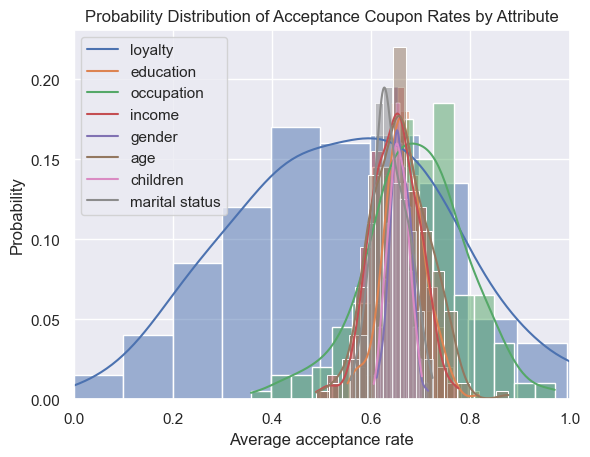

In [45]:
loyalty = coffee_shops.groupby('CoffeeHouse')['Y'].mean().describe()
education = loyal.groupby('education')['Y'].mean().describe()
occupation = loyal.groupby('occupation')['Y'].mean().describe()
income = loyal.groupby('income')['Y'].mean().describe()
gender = loyal.groupby('gender')['Y'].mean().describe()
age = loyal.groupby('age')['Y'].mean().describe()
children = loyal.groupby('has_children')['Y'].mean().describe()
marital_status = loyal.groupby('maritalStatus')['Y'].mean().describe()

sns.histplot(np.random.normal(loyalty.loc['mean'], loyalty.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(education.loc['mean'], education.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(occupation.loc['mean'], occupation.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(income.loc['mean'], income.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(gender.loc['mean'], gender.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(age.loc['mean'], age.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(children.loc['mean'], children.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(marital_status.loc['mean'], marital_status.loc['std'], 200), kde=True, stat='probability')

plt.xlim(0, 1)

plt.legend(['loyalty', 'education', 'occupation', 'income', 'gender', 'age', 'children', 'marital status'])

plt.title('Probability Distribution of Acceptance Coupon Rates by Attribute')
plt.xlabel('Average acceptance rate')

plt.show()

**Answer 4:**

We know from before that loyalty is a good predictor of drivers that will accept coffee shop coupons. When we group by the values in `CoffeeHouse`, the mean of the acceptance rate in `Y` for the values are different. This leads to a flatter, broader probability distribution of the mean of the acceptance rates.

In contrast, if an attribute is not a good predictor of drivers accepting coupons, we expect the conversion rate of accepting coupons to be very similar when grouping by values of that attribute. This results in narrower probability distributions of the mean of the acceptance rates for that attribute.

The chart above shows that when compared to how frequently customers go to coffee shops, other driver attributes like age. marital status, income, etc. don't seem to be as strong of an influence.

### 5. Does the number of times a loyal coffee shop driver visit bars and restaurants indicate whether the driver will accept a coffee shop coupon?

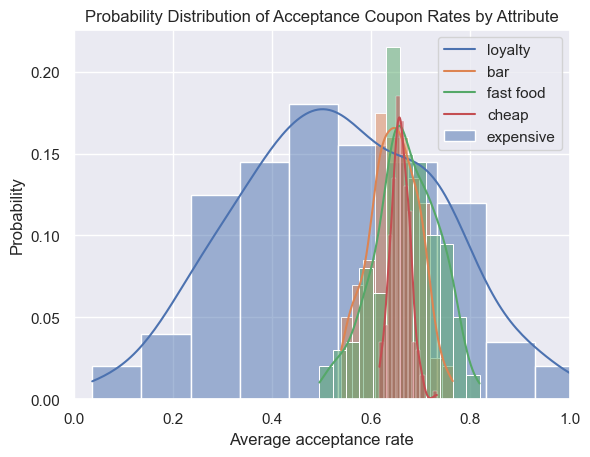

In [46]:
bar = loyal.groupby('Bar')['Y'].mean().describe()
fastfood = loyal.groupby('CarryAway')['Y'].mean().describe()
cheap = loyal.groupby('Restaurant20To50')['Y'].mean().describe()
expensive = loyal.groupby('gender')['Y'].mean().describe()

sns.histplot(np.random.normal(loyalty.loc['mean'], loyalty.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(bar.loc['mean'], bar.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(fastfood.loc['mean'], fastfood.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(expensive.loc['mean'], expensive.loc['std'], 200), kde=True, stat='probability')

plt.xlim(0, 1)

plt.legend(['loyalty', 'bar', 'fast food', 'cheap', 'expensive'])
plt.title('Probability Distribution of Acceptance Coupon Rates by Attribute')
plt.xlabel('Average acceptance rate')
plt.show()

**Answer 5:**

As before, it does not appear that the number of times a driver visits other establishments correlates will with whether the driver will accept coffee shop coupons.

### 6. Does the driver's journey context indicate whether the driver will accept a coffee shop coupon?

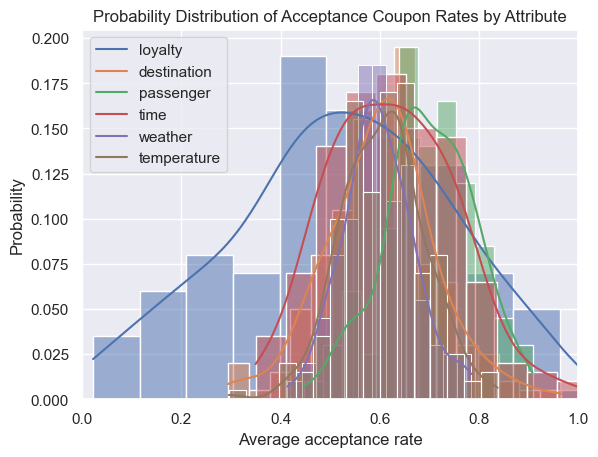

In [47]:
destination = loyal.groupby('destination')['Y'].mean().describe()
passenger = loyal.groupby('passenger')['Y'].mean().describe()
time = loyal.groupby('time')['Y'].mean().describe()
weather = loyal.groupby('weather')['Y'].mean().describe()
temperature = loyal.groupby('temperature')['Y'].mean().describe()

sns.histplot(np.random.normal(loyalty.loc['mean'], loyalty.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(destination.loc['mean'], destination.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(passenger.loc['mean'], passenger.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(time.loc['mean'], time.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(weather.loc['mean'], weather.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(temperature.loc['mean'], temperature.loc['std'], 200), kde=True, stat='probability')

plt.xlim(0, 1)

plt.legend(['loyalty', 'destination', 'passenger', 'time', 'weather', 'temperature'])

plt.title('Probability Distribution of Acceptance Coupon Rates by Attribute')
plt.xlabel('Average acceptance rate')
plt.show()

**Answer 6:**

As before, it does not appear that the context of a driver's journey correlates will with whether the driver will accept coffee shop coupons.

### 7. What factors appear effective at getting drivers that don't have a habit of going to coffee shops to accept coffee shop coupons?

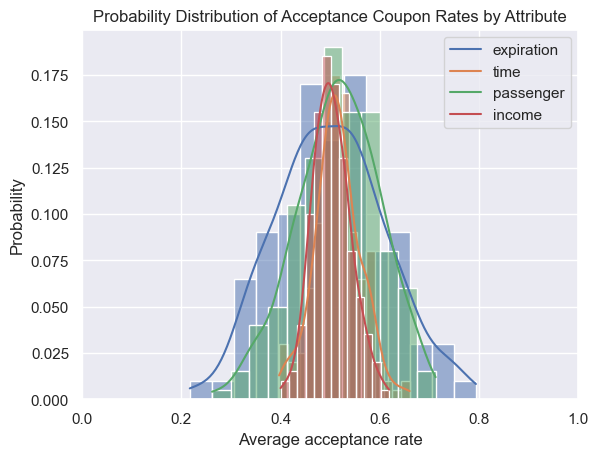

In [56]:
new_customers = data.query('CoffeeHouse in ["never", "less1"]')
expiration = new_customers.groupby(['expiration'])['Y'].mean().describe()
time = new_customers.groupby(['time'])['Y'].mean().describe()
passenger = new_customers.groupby('passenger')['Y'].mean().describe()
income = new_customers.groupby('income')['Y'].mean().describe()

sns.histplot(np.random.normal(expiration.loc['mean'], expiration.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(time.loc['mean'], time.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(passenger.loc['mean'], passenger.loc['std'], 200), kde=True, stat='probability')
sns.histplot(np.random.normal(income.loc['mean'], income.loc['std'], 200), kde=True, stat='probability')

plt.xlim(0, 1)

plt.legend(['expiration', 'time', 'passenger', 'income'])

plt.title('Probability Distribution of Acceptance Coupon Rates by Attribute')
plt.xlabel('Average acceptance rate')
plt.show()

**Observation**

Based on this analysis, it looks like expiration really influences the likelihood that a driver who does not regularly visit coffee shops will accept a coffee shop coupon.

In [54]:
new_customers.groupby(['expiration', 'passenger'])['Y'].mean()

same_day = new_customers.query('expiration == "2h"')
next_day = new_customers.query('expiration == "1d"')
breakdown = pd.DataFrame(
  {
    'same_day_mean': same_day.groupby('passenger')['Y'].mean(),
    'next_day_mean': next_day.groupby('passenger')['Y'].mean(),
    'same_day_n': same_day.groupby('passenger')['Y'].count(),
    'next_day_n': next_day.groupby('passenger')['Y'].count()
  }
).reset_index()
breakdown
# breakdown['t'] = breakdown['time'].apply(lambda s: int(s[:-2]) + (12 if 'PM' in s else 0))
# breakdown.set_index('t')

,passenger,same_day_mean,next_day_mean,same_day_n,next_day_n
0,Alone,0.340548,0.548254,1386,2176
1,Friend(s),0.552439,0.683377,820,758
2,Kid(s),0.419512,0.435897,205,234
3,Partner,0.477444,0.560656,266,305


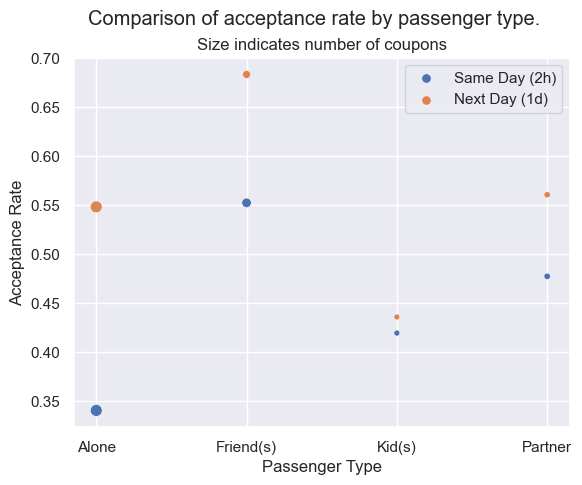

In [62]:
sns.scatterplot(breakdown, x='passenger', y='same_day_mean', size='same_day_n', legend=False)
sns.scatterplot(breakdown, x='passenger', y='next_day_mean', size='next_day_n', legend=False)

plt.legend(['Same Day (2h)', 'Next Day (1d)'])

plt.suptitle('Comparison of acceptance rate by passenger type.')
plt.title('Size indicates number of coupons')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')

plt.show()

**Answer 7:**

It appears that the most effective strategy to reach new customers may be to send coupons to these drivers that will expire the next day. Those that are traveling alone appear to be willing to accept the coupon at a rate of almost 55% than if the coupon expires within hours.

### 7. Based on these observations, what do you hypothesize about drivers who accepted the coffee shop coupons?

**Answer 8:**

Drivers who tend to go to coffee shop are very likely to accept coffee shop coupons at a rate of 65.9%, as long as the coupons are convenient. If the coupon requires the driver to go in the opposite direction, or go out of their way, right then, then the rate drops to 47.4%. In contrast, if the coupon is convenient, same direction, or next day for example, the acceptance rate is as high as 73.0%.

Other factors don't seem to influence the likelihood that a driver who tends to go to coffee shop will accept coffee shop coupons.

There does appear to be an opportunity to attract drivers that don't tend to go to coffee shops. The best strategy appears to be to send coupons that will expire the next day. Drivers traveling alone have an almost 55% likelihood of accepting a next day coupon.